In [ ]:
# Menyimpan ke file CSV
csv_file = "/content/drive/MyDrive/TA/chb05_13_1menit.csv"
df_cut.to_csv(csv_file, index=False)

print(f"Data berhasil disimpan dalam file CSV: {csv_file}")

# sampel 2 menit

In [ ]:
!pip install mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne #library untuk pemrosesan sinyal elektroensefalografi (EEG)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


In [ ]:
file1 = "/content/drive/MyDrive/TA/EDF/chb01_03.edf"
data1 = mne.io.read_raw_edf(file1) # membaca file edf dan menyimpannya di data1
data1

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb05_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-17-3c6f315d4026>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf(file1) # membaca file edf dan menyimpannya di data1


<RawEDF | chb05_13.edf, 23 x 921600 (3600.0 s), ~23 KiB, data not loaded>

In [ ]:
# Mendapatkan data dan informasi dari file EDF
data, times = data1.get_data(return_times=True)  # Mengambil data EEG dan waktu
channel_names = data1.ch_names  # Mendapatkan nama channel

In [ ]:
# Membuat DataFrame dengan data EEG dan waktu
df1 = pd.DataFrame(data.T, columns=channel_names)  # Transpose data sehingga sesuai dengan format DataFrame
df1['Time'] = times  # Menambahkan kolom waktu
df1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,-7.228327e-06,-3.965812e-05,-5.333333e-05,-4.942613e-05,1.013919e-04,-1.631258e-04,-7.833944e-05,-9.572650e-06,6.505495e-05,-4.395604e-05,...,-5.294261e-05,2.910867e-05,-1.334310e-04,-6.700855e-05,5.372405e-05,-5.958486e-05,-8.849817e-05,3.614164e-05,-5.294261e-05,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.007812
3,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.758242e-06,-9.768010e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.011719
4,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,5.860806e-07,5.860806e-07,0.015625


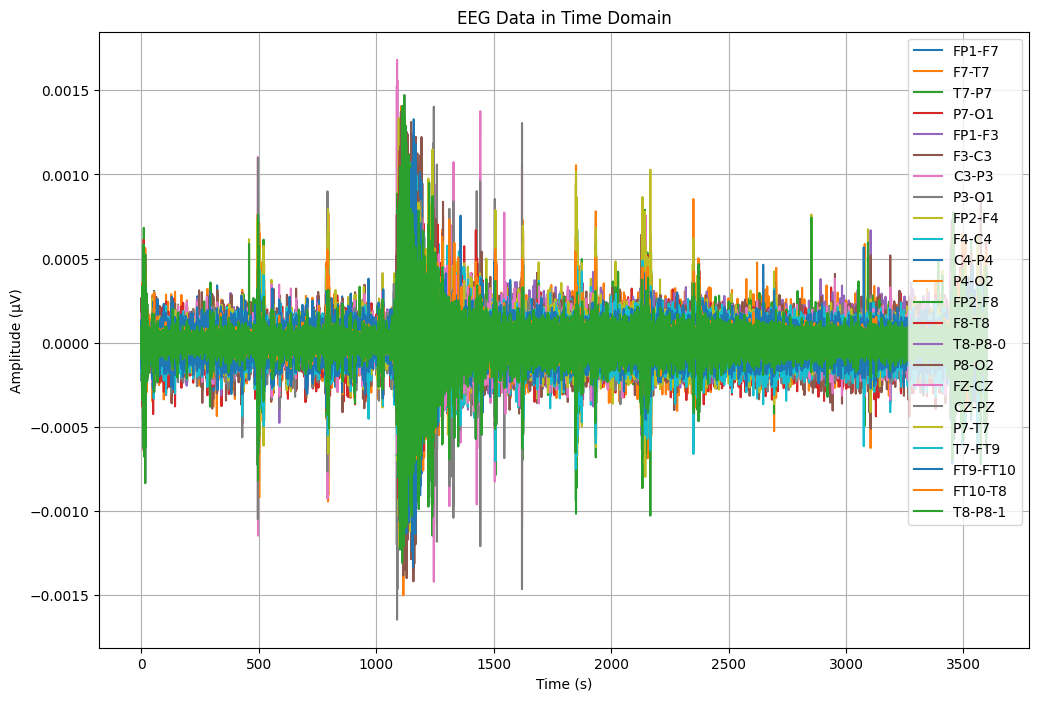

In [ ]:
# Time Domain
# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']  # Anda bisa memilih saluran lainnya
time = df1['Time']  # Kolom waktu

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran
for channel in channels:
    plt.plot(time, df1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Load data into a DataFrame (asuming it's loaded already)
# df = pd.read_csv("eeg_data.csv")  # Contoh jika data dalam bentuk CSV

# Menentukan sample rate (misalkan 256 Hz)
sample_rate = 256  # Sesuaikan dengan sample rate data kamu

# Konversi waktu ke indeks data (dalam sampel)
start_time_seconds = 1056   # Waktu mulai (15:05:00) dalam detik dari 14:43:12
end_time_seconds = 1226    # Waktu akhir (15:10:00) dalam detik dari 14:43:12

start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

# Potong data berdasarkan rentang waktu
df_cut = df1.iloc[start_index:end_index]

# Menyimpan ke file CSV
csv_file = "/content/drive/MyDrive/TA/chb05_13_05menit.csv"
df_cut.to_csv(csv_file, index=False)

print(f"Data berhasil disimpan dalam file CSV: {csv_file}")

Data berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/chb05_13_05menit.csv


In [ ]:
# import data yang sudah dipotong
TA1 = pd.read_csv("/content/drive/MyDrive/TA/chb05_13_05menit.csv")
TA1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,-0.000005,-0.000043,-0.000009,-0.000007,-0.000004,-0.000071,-6.837607e-06,0.000017,0.000003,-0.000040,...,-0.000012,-0.000034,-0.000070,0.000001,0.000009,0.000021,0.000005,0.000001,-0.000012,1056.000000
1,-0.000005,-0.000037,-0.000008,-0.000012,-0.000017,-0.000067,-1.953602e-07,0.000020,-0.000016,-0.000043,...,-0.000012,-0.000027,-0.000076,0.000006,0.000008,0.000037,0.000002,-0.000019,-0.000012,1056.003906
2,-0.000007,-0.000030,-0.000010,-0.000013,-0.000027,-0.000060,2.539683e-06,0.000021,-0.000035,-0.000043,...,-0.000013,-0.000022,-0.000079,0.000015,0.000011,0.000023,0.000001,-0.000014,-0.000013,1056.007812
3,-0.000005,-0.000020,-0.000011,-0.000019,-0.000033,-0.000046,6.446886e-06,0.000015,-0.000042,-0.000038,...,-0.000006,-0.000017,-0.000076,0.000022,0.000011,0.000008,-0.000003,-0.000006,-0.000006,1056.011719
4,-0.000006,-0.000009,-0.000008,-0.000026,-0.000041,-0.000031,1.035409e-05,0.000009,-0.000048,-0.000035,...,-0.000003,-0.000008,-0.000066,0.000027,0.000008,0.000022,-0.000010,-0.000025,-0.000003,1056.015625


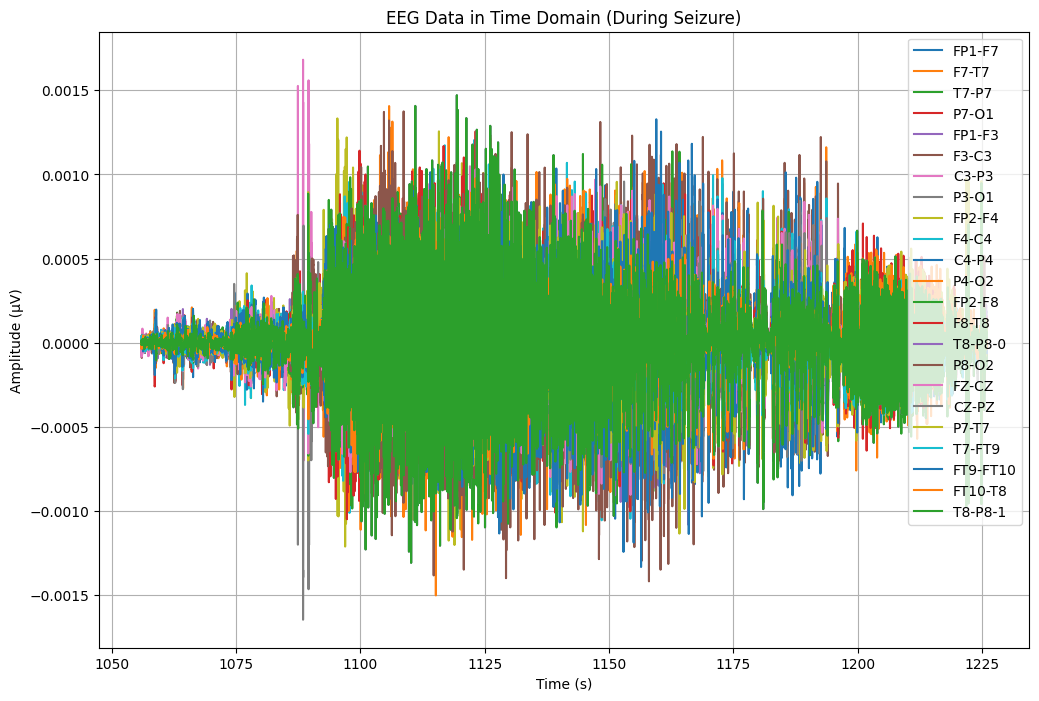

In [ ]:
# menampilkan data yang sudah dipotong dalam domain time
# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Mengambil data waktu dari kolom 'Time'
time = TA1['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in TA1.columns:  # Memastikan saluran ada dalam data
        plt.plot(time, TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


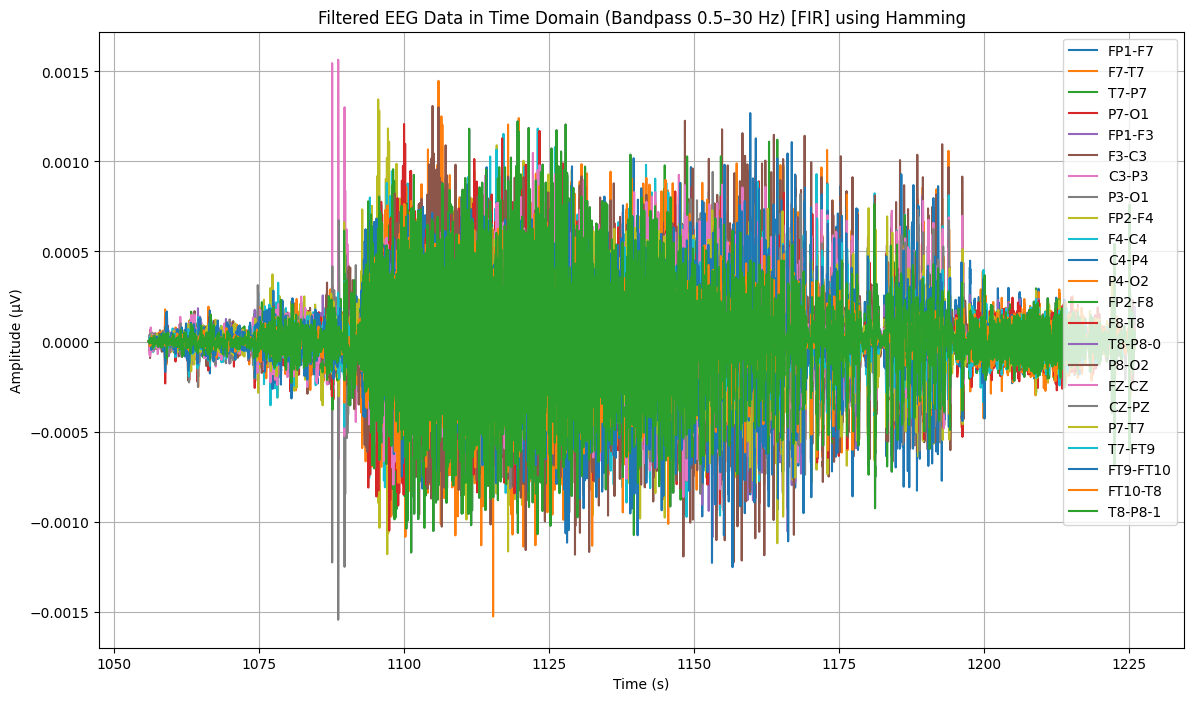

In [ ]:
from scipy.signal import firwin, lfilter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk membuat filter band-pass menggunakan FIR
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate  # Frekuensi Nyquist
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')  # Desain koefisien filter FIR dengan Hamming window
    filtered_data = lfilter(taps, 1.0, data, axis=0)  # Terapkan filter pada data
    return filtered_data

# Parameter untuk filter
lowcut_freq = 0.5  # Frekuensi cutoff bawah dalam Hz
highcut_freq = 30  # Frekuensi cutoff atas dalam Hz
sampling_rate = 256  # Frekuensi sampling (dalam data EEG Anda)
num_taps = 101  # Panjang filter (orde + 1)

# Mengambil data waktu dan sinyal EEG dari data yang sudah dipotong (TA1)
time = TA1['Time'].values  # Kolom waktu
eeg_columns = TA1.columns[:-1]  # Semua kolom kecuali 'Time' (saluran EEG)
eeg_data = TA1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

# Membuat DataFrame dari data yang telah difilter
filtered_df = pd.DataFrame(filtered_data, columns=eeg_columns)
filtered_df['Time'] = time  # Menambahkan kolom waktu ke data yang telah difilter

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        plt.plot(filtered_df['Time'], filtered_df[channel], label=channel)  # Menampilkan data yang sudah difilter

# Memberikan judul dan label pada plot
plt.title('Filtered EEG Data in Time Domain (Bandpass 0.5–30 Hz) [FIR] using Hamming')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


In [ ]:
filtered_df

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,3.628962e-09,2.970372e-08,6.048269e-09,4.704209e-09,3.091338e-09,4.878937e-08,4.704209e-09,-1.142451e-08,-2.016090e-09,2.755323e-08,...,8.198765e-09,2.352105e-08,4.825175e-08,-9.408419e-10,-6.317081e-09,-1.411263e-08,-3.360150e-09,-9.408419e-10,8.198765e-09,1056.000000
1,7.704109e-09,6.122766e-08,1.248177e-08,1.356101e-08,1.539373e-08,1.045034e-07,5.765465e-09,-2.725043e-08,8.473574e-09,6.268564e-08,...,1.828171e-08,4.656891e-08,1.097737e-07,-5.023985e-09,-1.307235e-08,-4.256472e-08,-5.231839e-09,1.217998e-08,1.828171e-08,1056.003906
2,1.242559e-08,8.157223e-08,1.956346e-08,2.329281e-08,3.583080e-08,1.459119e-07,3.208867e-09,-4.227669e-08,3.503544e-08,9.334634e-08,...,2.776737e-08,6.093692e-08,1.658835e-07,-1.570523e-08,-2.042806e-08,-6.084076e-08,-5.814012e-09,2.451163e-08,2.776737e-08,1056.007812
3,1.455975e-08,7.970269e-08,2.438689e-08,3.433024e-08,5.832562e-08,1.525830e-07,-3.959959e-09,-4.703449e-08,6.802112e-08,1.065454e-07,...,2.840318e-08,6.020285e-08,1.953897e-07,-3.198245e-08,-2.539035e-08,-5.806159e-08,-1.810067e-09,2.893614e-08,2.840318e-08,1056.011719
4,1.469831e-08,5.398048e-08,2.375654e-08,4.658174e-08,8.001974e-08,1.195755e-07,-1.458934e-08,-3.870640e-08,9.844945e-08,9.850114e-08,...,2.037748e-08,4.194994e-08,1.856734e-07,-4.938446e-08,-2.473458e-08,-5.006197e-08,8.592467e-09,3.906868e-08,2.037748e-08,1056.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43515,1.586637e-04,3.272596e-05,6.178815e-06,2.990024e-05,1.807400e-04,8.839266e-05,-2.330179e-05,-1.664515e-05,6.765744e-05,5.147665e-05,...,2.443427e-05,-3.306605e-06,8.741507e-05,-8.505642e-06,-5.869790e-06,-9.210585e-06,4.777852e-06,2.620951e-05,2.443427e-05,1225.980469
43516,1.627605e-04,3.561715e-05,1.050858e-05,2.496626e-05,1.851080e-04,9.150786e-05,-2.268439e-05,-1.856947e-05,6.766157e-05,5.343805e-05,...,2.727992e-05,-3.768064e-06,8.893178e-05,-7.026562e-06,-1.019956e-05,-1.220481e-05,1.552237e-06,2.862782e-05,2.727992e-05,1225.984375
43517,1.655789e-04,3.538812e-05,1.954241e-05,1.676832e-05,1.886296e-04,9.390252e-05,-2.227661e-05,-2.159238e-05,6.874349e-05,5.396040e-05,...,3.494916e-05,-9.634037e-06,8.945650e-05,-6.355489e-06,-1.923339e-05,-1.448935e-05,8.292052e-07,2.735461e-05,3.494916e-05,1225.988281
43518,1.673202e-04,3.308624e-05,3.123564e-05,6.740767e-06,1.909917e-04,9.585901e-05,-2.192624e-05,-2.518385e-05,7.164307e-05,5.301329e-05,...,4.621126e-05,-1.937585e-05,8.926482e-05,-6.138278e-06,-3.092662e-05,-1.587835e-05,1.795149e-06,2.360097e-05,4.621126e-05,1225.992188


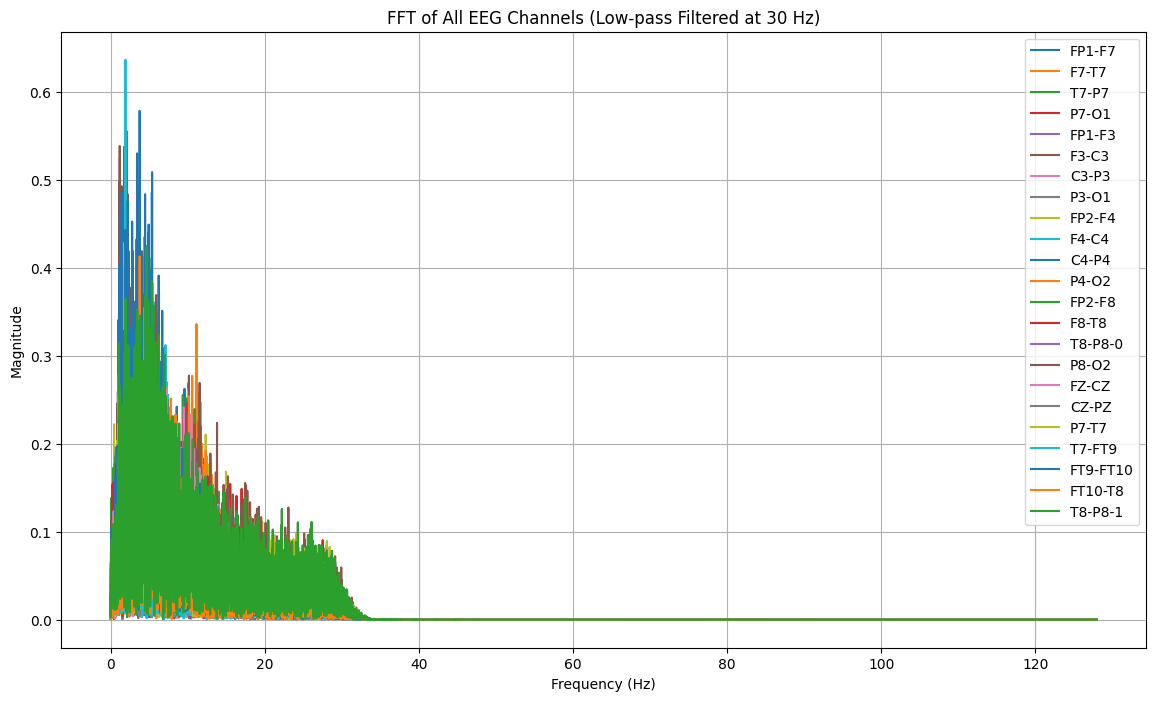

In [ ]:
# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT
        plt.plot(fft_freqs, fft_vals, label=channel)  # Menambahkan ke plot

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels (Low-pass Filtered at 30 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


       Frequency (Hz)  FP1-F7 (Magnitude)  F7-T7 (Magnitude)  \
0            0.000000            0.002009           0.007795   
1            0.005882            0.010903           0.003973   
2            0.011765            0.014444           0.002714   
3            0.017647            0.010703           0.016031   
4            0.023529            0.012470           0.008708   
...               ...                 ...                ...   
21755      127.970588            0.000085           0.000014   
21756      127.976471            0.000087           0.000010   
21757      127.982353            0.000087           0.000016   
21758      127.988235            0.000084           0.000019   
21759      127.994118            0.000080           0.000022   

       T7-P7 (Magnitude)  P7-O1 (Magnitude)  FP1-F3 (Magnitude)  \
0               0.008145           0.006192            0.001657   
1               0.003898           0.001301            0.008863   
2               0.008444      

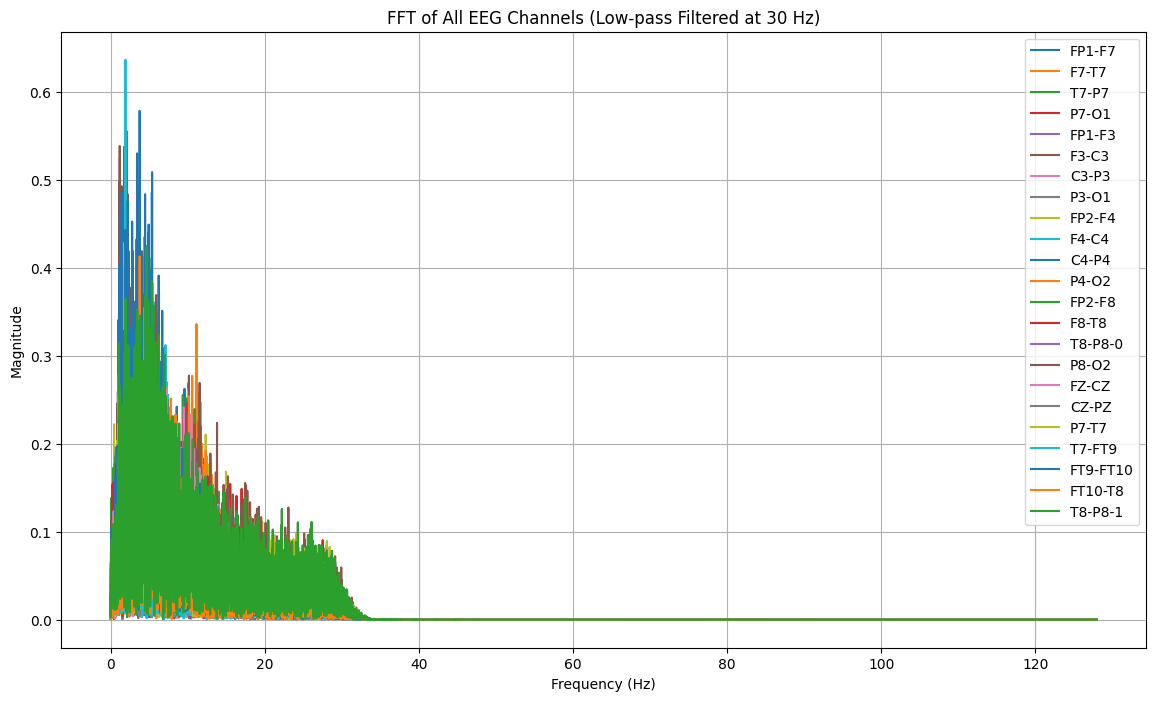

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat DataFrame kosong untuk menyimpan hasil FFT
fft_df = pd.DataFrame()

# Menghitung FFT untuk setiap saluran EEG dan memasukkan hasilnya ke dalam DataFrame
for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT

        # Membuat DataFrame untuk hasil FFT dari saluran ini
        channel_fft_df = pd.DataFrame({'Frequency (Hz)': fft_freqs, f'{channel} (Magnitude)': fft_vals})

        # Gabungkan ke DataFrame utama
        if fft_df.empty:
            fft_df = channel_fft_df
        else:
            fft_df = pd.merge(fft_df, channel_fft_df, on='Frequency (Hz)')

# Menampilkan DataFrame yang berisi frekuensi dan magnitude untuk setiap saluran EEG
print(fft_df)

# Plot hasil FFT untuk semua saluran EEG
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        plt.plot(fft_df['Frequency (Hz)'], fft_df[f'{channel} (Magnitude)'], label=channel)

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels (Low-pass Filtered at 30 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


In [ ]:
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 1086:
        return "tidak kejang"
    elif 1086 <= row['Time'] < 1196:
        return "kejang"
    else:
        return "tidak kejang"

# Menyalin data1 ke df1 dan menambahkan kolom 'seizure' berdasarkan fungsi di atas
TA_1 = filtered_df.copy()
TA_1['seizure'] = filtered_df.apply(label_seizure, axis=1)

# Menampilkan hasil
print(TA_1[['Time', 'seizure', 'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']].head())

          Time       seizure        FP1-F7         F7-T7         T7-P7  \
0  1056.000000  tidak kejang  3.628962e-09  2.970372e-08  6.048269e-09   
1  1056.003906  tidak kejang  7.704109e-09  6.122766e-08  1.248177e-08   
2  1056.007812  tidak kejang  1.242559e-08  8.157223e-08  1.956346e-08   
3  1056.011719  tidak kejang  1.455975e-08  7.970269e-08  2.438689e-08   
4  1056.015625  tidak kejang  1.469831e-08  5.398048e-08  2.375654e-08   

          P7-O1        FP1-F3         F3-C3         C3-P3         P3-O1  ...  \
0  4.704209e-09  3.091338e-09  4.878937e-08  4.704209e-09 -1.142451e-08  ...   
1  1.356101e-08  1.539373e-08  1.045034e-07  5.765465e-09 -2.725043e-08  ...   
2  2.329281e-08  3.583080e-08  1.459119e-07  3.208867e-09 -4.227669e-08  ...   
3  3.433024e-08  5.832562e-08  1.525830e-07 -3.959959e-09 -4.703449e-08  ...   
4  4.658174e-08  8.001974e-08  1.195755e-07 -1.458934e-08 -3.870640e-08  ...   

          F8-T8       T8-P8-0         P8-O2         FZ-CZ         CZ-PZ  \

In [ ]:
# Simpan data yang sudah dilabel jadi kejang dan tidak kejang
TA_1.to_csv("/content/drive/MyDrive/TA/hamming_bandpass_chb05_13_05menit.csv", index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Misalkan df adalah dataframe yang Anda miliki, dengan kolom 'seizure' yang berisi label "kejang" dan "tidak kejang"
# Contoh data:
# df = pd.read_csv('data.csv')

# Menentukan fitur (X) dan label (y)
X = TA_1.drop(['Time', 'seizure'], axis=1)  # Menghapus kolom 'Time' dan 'seizure' dari fitur
y = TA_1['seizure']  # Label target

# Membagi data menjadi data pelatihan dan data pengujian secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Membuat dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9809283088235294
Laporan Klasifikasi:
               precision    recall  f1-score   support

      kejang       0.99      0.98      0.99      5632
tidak kejang       0.96      0.99      0.97      3072

    accuracy                           0.98      8704
   macro avg       0.98      0.98      0.98      8704
weighted avg       0.98      0.98      0.98      8704



# sampel 3 menit

In [ ]:
!pip install mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne #library untuk pemrosesan sinyal elektroensefalografi (EEG)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


In [ ]:
file1 = "/content/drive/MyDrive/TA/EDF/chb05_13.edf"
data1 = mne.io.read_raw_edf(file1) # membaca file edf dan menyimpannya di data1
data1

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb05_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-3-3c6f315d4026>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf(file1) # membaca file edf dan menyimpannya di data1


<RawEDF | chb05_13.edf, 23 x 921600 (3600.0 s), ~23 KiB, data not loaded>

In [ ]:
# Mendapatkan data dan informasi dari file EDF
data, times = data1.get_data(return_times=True)  # Mengambil data EEG dan waktu
channel_names = data1.ch_names  # Mendapatkan nama channel

In [ ]:
# Membuat DataFrame dengan data EEG dan waktu
df1 = pd.DataFrame(data.T, columns=channel_names)  # Transpose data sehingga sesuai dengan format DataFrame
df1['Time'] = times  # Menambahkan kolom waktu
df1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,-7.228327e-06,-3.965812e-05,-5.333333e-05,-4.942613e-05,1.013919e-04,-1.631258e-04,-7.833944e-05,-9.572650e-06,6.505495e-05,-4.395604e-05,...,-5.294261e-05,2.910867e-05,-1.334310e-04,-6.700855e-05,5.372405e-05,-5.958486e-05,-8.849817e-05,3.614164e-05,-5.294261e-05,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.007812
3,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.758242e-06,-9.768010e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.011719
4,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,5.860806e-07,5.860806e-07,0.015625


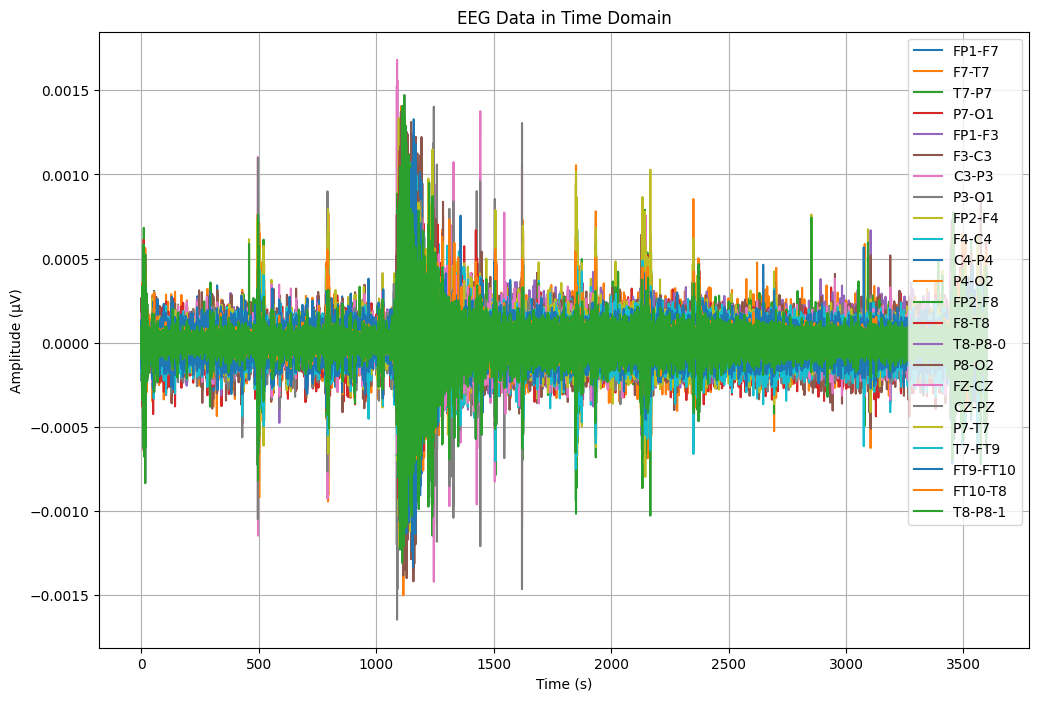

In [ ]:
# Time Domain
# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']  # Anda bisa memilih saluran lainnya
time = df1['Time']  # Kolom waktu

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran
for channel in channels:
    plt.plot(time, df1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Load data into a DataFrame (asuming it's loaded already)
# df = pd.read_csv("eeg_data.csv")  # Contoh jika data dalam bentuk CSV

# Menentukan sample rate (misalkan 256 Hz)
sample_rate = 256  # Sesuaikan dengan sample rate data kamu

# Konversi waktu ke indeks data (dalam sampel)
start_time_seconds = 1026   # Waktu mulai (15:05:00) dalam detik dari 14:43:12
end_time_seconds = 1256    # Waktu akhir (15:10:00) dalam detik dari 14:43:12

start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

# Potong data berdasarkan rentang waktu
df_cut = df1.iloc[start_index:end_index]

# Menyimpan ke file CSV
csv_file = "/content/drive/MyDrive/TA/chb05_13_1menit.csv"
df_cut.to_csv(csv_file, index=False)

print(f"Data berhasil disimpan dalam file CSV: {csv_file}")

Data berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/chb05_13_1menit.csv


In [ ]:
# import data yang sudah dipotong
TA1 = pd.read_csv("/content/drive/MyDrive/TA/chb05_13_1menit.csv")
TA1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,-0.000014,0.000031,0.000098,-0.000030,0.000088,0.000012,8.400488e-06,-0.000027,0.000043,0.000051,...,0.000071,0.000016,0.000064,-0.000059,-0.000097,-0.000054,-0.000017,0.000004,0.000071,1026.000000
1,-0.000009,0.000028,0.000098,-0.000031,0.000090,0.000019,3.711844e-06,-0.000029,0.000048,0.000053,...,0.000062,0.000017,0.000069,-0.000060,-0.000097,-0.000063,-0.000019,0.000018,0.000062,1026.003906
2,-0.000003,0.000025,0.000100,-0.000033,0.000095,0.000031,-1.953602e-07,-0.000038,0.000053,0.000058,...,0.000053,0.000018,0.000076,-0.000067,-0.000099,-0.000075,-0.000025,0.000039,0.000053,1026.007812
3,0.000004,0.000019,0.000102,-0.000035,0.000104,0.000041,-8.791209e-06,-0.000048,0.000060,0.000057,...,0.000046,0.000017,0.000087,-0.000083,-0.000101,-0.000056,-0.000032,0.000029,0.000046,1026.011719
4,0.000005,0.000013,0.000103,-0.000038,0.000110,0.000044,-1.347985e-05,-0.000056,0.000063,0.000051,...,0.000047,0.000015,0.000094,-0.000092,-0.000103,-0.000046,-0.000036,0.000021,0.000047,1026.015625


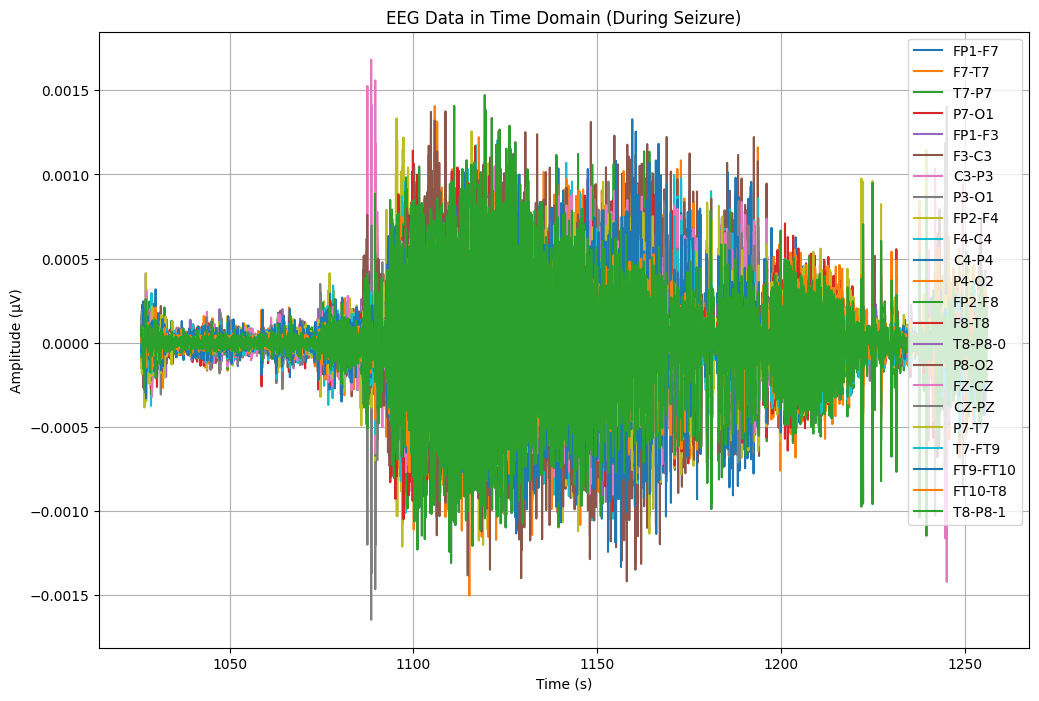

In [ ]:
# menampilkan data yang sudah dipotong dalam domain time
# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Mengambil data waktu dari kolom 'Time'
time = TA1['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in TA1.columns:  # Memastikan saluran ada dalam data
        plt.plot(time, TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


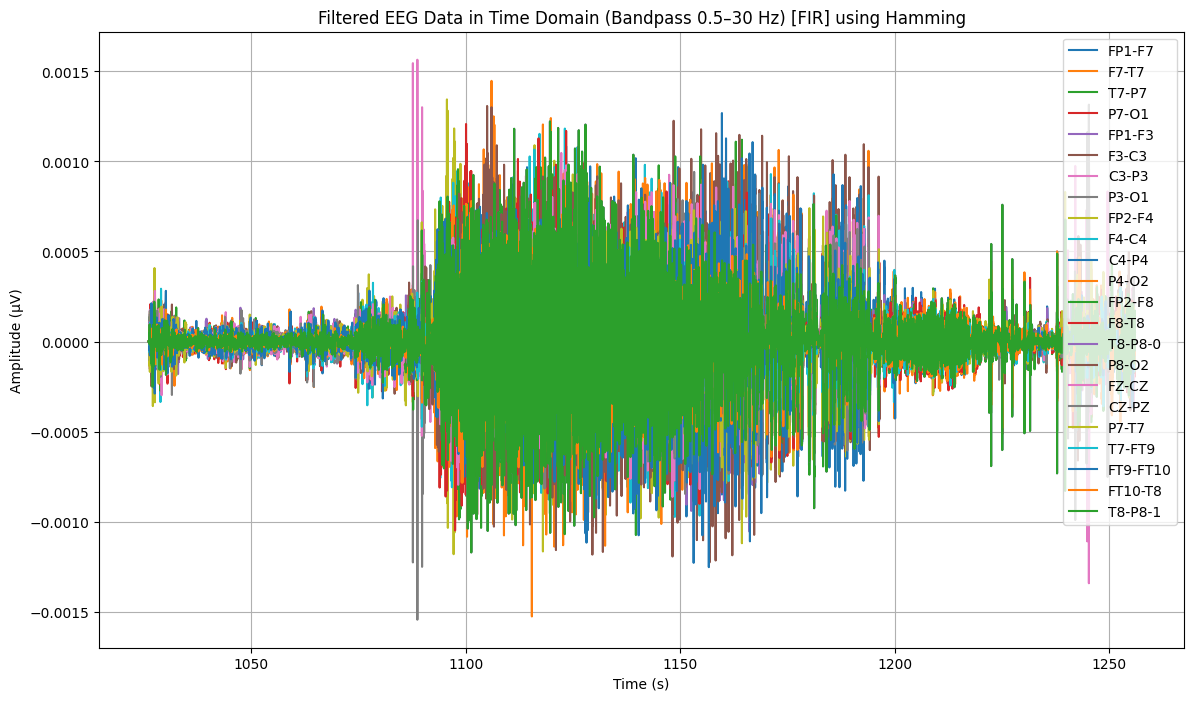

In [ ]:
from scipy.signal import firwin, lfilter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk membuat filter band-pass menggunakan FIR
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate  # Frekuensi Nyquist
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')  # Desain koefisien filter FIR dengan Hamming window
    filtered_data = lfilter(taps, 1.0, data, axis=0)  # Terapkan filter pada data
    return filtered_data

# Parameter untuk filter
lowcut_freq = 0.5  # Frekuensi cutoff bawah dalam Hz
highcut_freq = 30  # Frekuensi cutoff atas dalam Hz
sampling_rate = 256  # Frekuensi sampling (dalam data EEG Anda)
num_taps = 101  # Panjang filter (orde + 1)

# Mengambil data waktu dan sinyal EEG dari data yang sudah dipotong (TA1)
time = TA1['Time'].values  # Kolom waktu
eeg_columns = TA1.columns[:-1]  # Semua kolom kecuali 'Time' (saluran EEG)
eeg_data = TA1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

# Membuat DataFrame dari data yang telah difilter
filtered_df = pd.DataFrame(filtered_data, columns=eeg_columns)
filtered_df['Time'] = time  # Menambahkan kolom waktu ke data yang telah difilter

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        plt.plot(filtered_df['Time'], filtered_df[channel], label=channel)  # Menampilkan data yang sudah difilter

# Memberikan judul dan label pada plot
plt.title('Filtered EEG Data in Time Domain (Bandpass 0.5–30 Hz) [FIR] using Hamming')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


In [ ]:
filtered_df

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,9.811637e-09,-2.137055e-08,-6.733740e-08,2.083293e-08,-6.061710e-08,-8.198765e-09,-5.779457e-09,1.841362e-08,-2.970372e-08,-3.534877e-08,...,-4.905818e-08,-1.115570e-08,-4.395076e-08,4.072501e-08,6.706859e-08,3.723046e-08,1.169332e-08,-3.091338e-09,-4.905818e-08,1026.000000
1,1.779305e-08,-4.506996e-08,-1.479420e-07,4.657691e-08,-1.347902e-07,-2.285151e-08,-9.471871e-09,4.206806e-08,-6.848558e-08,-7.900622e-08,...,-1.013306e-07,-2.477816e-08,-9.978668e-08,8.974270e-08,1.473514e-07,8.824775e-08,2.676577e-08,-1.593135e-08,-1.013306e-07,1026.003906
2,1.898875e-08,-6.218240e-08,-2.179267e-07,6.985362e-08,-2.014681e-07,-4.560289e-08,-8.813770e-09,6.895139e-08,-1.063889e-07,-1.196050e-07,...,-1.374330e-07,-3.754679e-08,-1.538256e-07,1.369539e-07,2.170621e-07,1.417169e-07,4.454231e-08,-4.453871e-08,-1.374330e-07,1026.007812
3,1.050256e-08,-6.410633e-08,-2.556629e-07,8.433692e-08,-2.441462e-07,-7.178733e-08,6.206284e-10,9.422819e-08,-1.338264e-07,-1.425052e-07,...,-1.442271e-07,-4.406397e-08,-1.935101e-07,1.754525e-07,2.546594e-07,1.642220e-07,6.198736e-08,-6.610759e-08,-1.442271e-07,1026.011719
4,-3.030128e-09,-4.946665e-08,-2.533491e-07,8.742293e-08,-2.536941e-07,-9.220591e-08,1.587838e-08,1.133117e-07,-1.438187e-07,-1.385168e-07,...,-1.247515e-07,-4.193452e-08,-2.097580e-07,1.960052e-07,2.523711e-07,1.498676e-07,7.457528e-08,-7.137488e-08,-1.247515e-07,1026.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58875,1.634269e-05,-1.057101e-05,1.618432e-05,-3.774700e-05,-4.302721e-06,9.738702e-06,9.075460e-05,-1.118533e-04,-1.074003e-05,5.693944e-05,...,3.576880e-05,-6.620061e-05,-5.363211e-06,-9.895239e-06,-1.587530e-05,-6.505655e-09,3.719669e-05,-1.453710e-05,3.576880e-05,1255.980469
58876,1.224083e-05,-1.663020e-05,-1.893327e-05,3.308550e-06,-8.761374e-06,7.770176e-06,8.744468e-05,-1.061107e-04,-3.291836e-05,6.494101e-05,...,5.253867e-05,-7.233783e-05,-3.632939e-06,-8.700196e-06,1.924229e-05,5.212235e-06,4.095593e-05,-2.469194e-05,5.253867e-05,1255.984375
58877,9.331248e-06,-2.256973e-05,-2.567096e-05,1.627656e-05,-1.219077e-05,7.795287e-06,7.902188e-05,-9.683215e-05,-5.812850e-05,7.209836e-05,...,6.911468e-05,-7.506545e-05,-1.118387e-06,-6.927321e-06,2.597999e-05,1.012619e-05,4.289039e-05,-3.541700e-05,6.911468e-05,1255.988281
58878,8.466037e-06,-2.769410e-05,-7.684218e-06,4.131347e-06,-1.335674e-05,9.128214e-06,6.982215e-05,-8.808729e-05,-7.809464e-05,7.665191e-05,...,7.444405e-05,-6.791586e-05,1.301283e-06,-4.788757e-06,7.993244e-06,1.541458e-05,4.183742e-05,-4.349003e-05,7.444405e-05,1255.992188


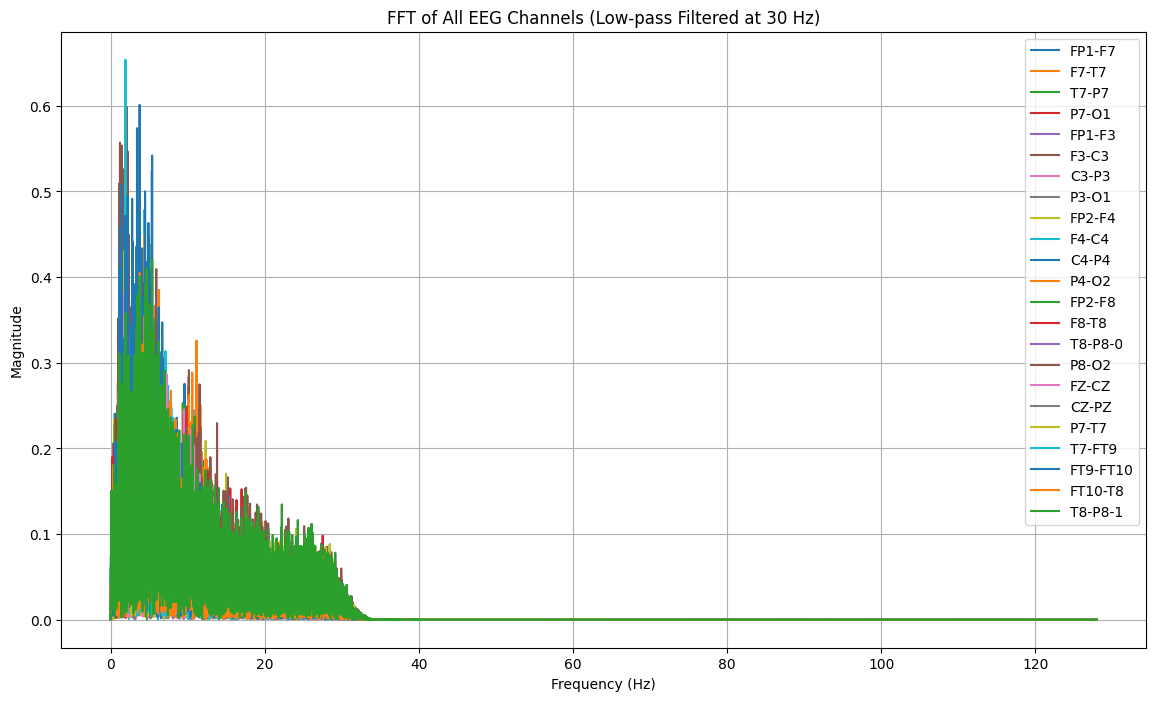

In [ ]:
# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT
        plt.plot(fft_freqs, fft_vals, label=channel)  # Menambahkan ke plot

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels (Low-pass Filtered at 30 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


       Frequency (Hz)  FP1-F7 (Magnitude)  F7-T7 (Magnitude)  \
0            0.000000            0.010611           0.009070   
1            0.004348            0.001877           0.004093   
2            0.008696            0.007123           0.009914   
3            0.013043            0.016240           0.011764   
4            0.017391            0.008580           0.013699   
...               ...                 ...                ...   
29435      127.978261            0.000003           0.000010   
29436      127.982609            0.000004           0.000017   
29437      127.986957            0.000009           0.000022   
29438      127.991304            0.000010           0.000025   
29439      127.995652            0.000006           0.000017   

       T7-P7 (Magnitude)  P7-O1 (Magnitude)  FP1-F3 (Magnitude)  \
0               0.000950           0.006366            0.000638   
1               0.007436           0.003210            0.007881   
2               0.007376      

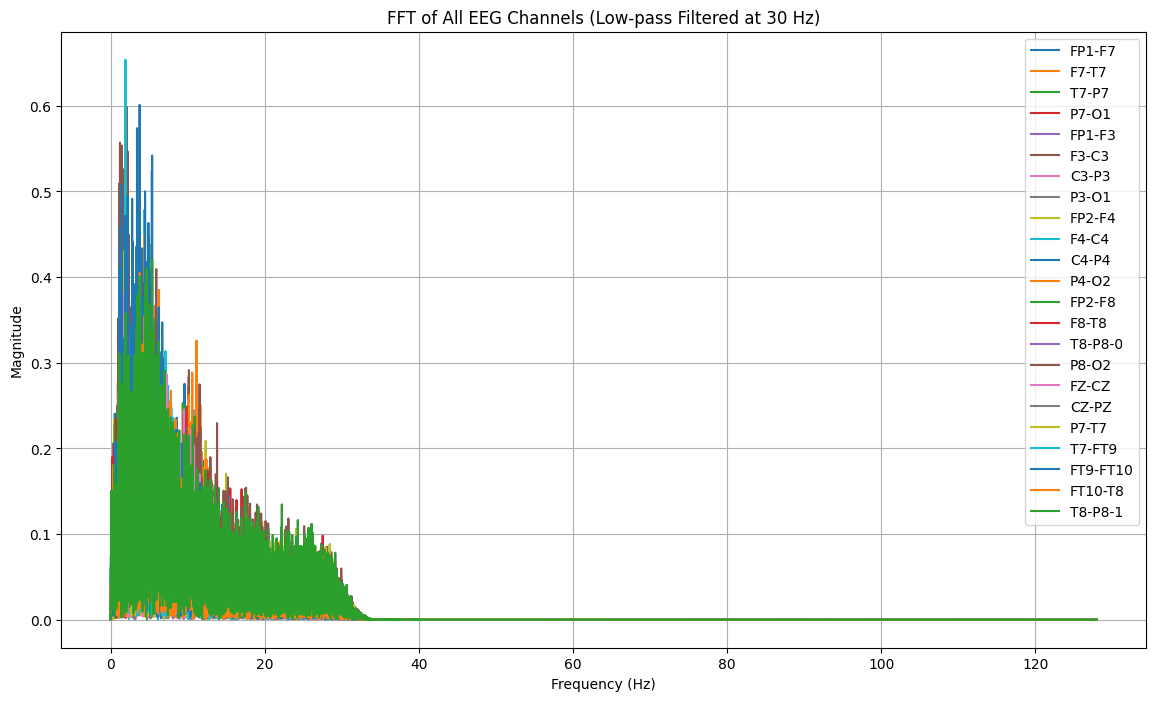

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat DataFrame kosong untuk menyimpan hasil FFT
fft_df = pd.DataFrame()

# Menghitung FFT untuk setiap saluran EEG dan memasukkan hasilnya ke dalam DataFrame
for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT

        # Membuat DataFrame untuk hasil FFT dari saluran ini
        channel_fft_df = pd.DataFrame({'Frequency (Hz)': fft_freqs, f'{channel} (Magnitude)': fft_vals})

        # Gabungkan ke DataFrame utama
        if fft_df.empty:
            fft_df = channel_fft_df
        else:
            fft_df = pd.merge(fft_df, channel_fft_df, on='Frequency (Hz)')

# Menampilkan DataFrame yang berisi frekuensi dan magnitude untuk setiap saluran EEG
print(fft_df)

# Plot hasil FFT untuk semua saluran EEG
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        plt.plot(fft_df['Frequency (Hz)'], fft_df[f'{channel} (Magnitude)'], label=channel)

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels (Low-pass Filtered at 30 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


In [ ]:
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 1086:
        return "tidak kejang"
    elif 1086 <= row['Time'] < 1196:
        return "kejang"
    else:
        return "tidak kejang"

# Menyalin data1 ke df1 dan menambahkan kolom 'seizure' berdasarkan fungsi di atas
TA_1 = filtered_df.copy()
TA_1['seizure'] = filtered_df.apply(label_seizure, axis=1)

# Menampilkan hasil
print(TA_1[['Time', 'seizure', 'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']].head())

          Time       seizure        FP1-F7         F7-T7         T7-P7  \
0  1026.000000  tidak kejang  9.811637e-09 -2.137055e-08 -6.733740e-08   
1  1026.003906  tidak kejang  1.779305e-08 -4.506996e-08 -1.479420e-07   
2  1026.007812  tidak kejang  1.898875e-08 -6.218240e-08 -2.179267e-07   
3  1026.011719  tidak kejang  1.050256e-08 -6.410633e-08 -2.556629e-07   
4  1026.015625  tidak kejang -3.030128e-09 -4.946665e-08 -2.533491e-07   

          P7-O1        FP1-F3         F3-C3         C3-P3         P3-O1  ...  \
0  2.083293e-08 -6.061710e-08 -8.198765e-09 -5.779457e-09  1.841362e-08  ...   
1  4.657691e-08 -1.347902e-07 -2.285151e-08 -9.471871e-09  4.206806e-08  ...   
2  6.985362e-08 -2.014681e-07 -4.560289e-08 -8.813770e-09  6.895139e-08  ...   
3  8.433692e-08 -2.441462e-07 -7.178733e-08  6.206284e-10  9.422819e-08  ...   
4  8.742293e-08 -2.536941e-07 -9.220591e-08  1.587838e-08  1.133117e-07  ...   

          F8-T8       T8-P8-0         P8-O2         FZ-CZ         CZ-PZ  \

In [ ]:
# Simpan data yang sudah dilabel jadi kejang dan tidak kejang
TA_1.to_csv("/content/drive/MyDrive/TA/hamming_bandpass_chb05_13_1menit.csv", index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Misalkan df adalah dataframe yang Anda miliki, dengan kolom 'seizure' yang berisi label "kejang" dan "tidak kejang"
# Contoh data:
# df = pd.read_csv('data.csv')

# Menentukan fitur (X) dan label (y)
X = TA_1.drop(['Time', 'seizure'], axis=1)  # Menghapus kolom 'Time' dan 'seizure' dari fitur
y = TA_1['seizure']  # Label target

# Membagi data menjadi data pelatihan dan data pengujian secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Membuat dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9813179347826086
Laporan Klasifikasi:
               precision    recall  f1-score   support

      kejang       1.00      0.97      0.98      5632
tidak kejang       0.97      1.00      0.98      6144

    accuracy                           0.98     11776
   macro avg       0.98      0.98      0.98     11776
weighted avg       0.98      0.98      0.98     11776



# sampel 5 menit

In [ ]:
!pip install mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne #library untuk pemrosesan sinyal elektroensefalografi (EEG)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


In [ ]:
file1 = "/content/drive/MyDrive/TA/EDF/chb05_13.edf"
data1 = mne.io.read_raw_edf(file1) # membaca file edf dan menyimpannya di data1
data1

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb05_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-3-3c6f315d4026>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf(file1) # membaca file edf dan menyimpannya di data1


<RawEDF | chb05_13.edf, 23 x 921600 (3600.0 s), ~23 KiB, data not loaded>

In [ ]:
# Mendapatkan data dan informasi dari file EDF
data, times = data1.get_data(return_times=True)  # Mengambil data EEG dan waktu
channel_names = data1.ch_names  # Mendapatkan nama channel

In [ ]:
# Membuat DataFrame dengan data EEG dan waktu
df1 = pd.DataFrame(data.T, columns=channel_names)  # Transpose data sehingga sesuai dengan format DataFrame
df1['Time'] = times  # Menambahkan kolom waktu
df1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,-7.228327e-06,-3.965812e-05,-5.333333e-05,-4.942613e-05,1.013919e-04,-1.631258e-04,-7.833944e-05,-9.572650e-06,6.505495e-05,-4.395604e-05,...,-5.294261e-05,2.910867e-05,-1.334310e-04,-6.700855e-05,5.372405e-05,-5.958486e-05,-8.849817e-05,3.614164e-05,-5.294261e-05,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.007812
3,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.758242e-06,-9.768010e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.011719
4,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,5.860806e-07,5.860806e-07,0.015625


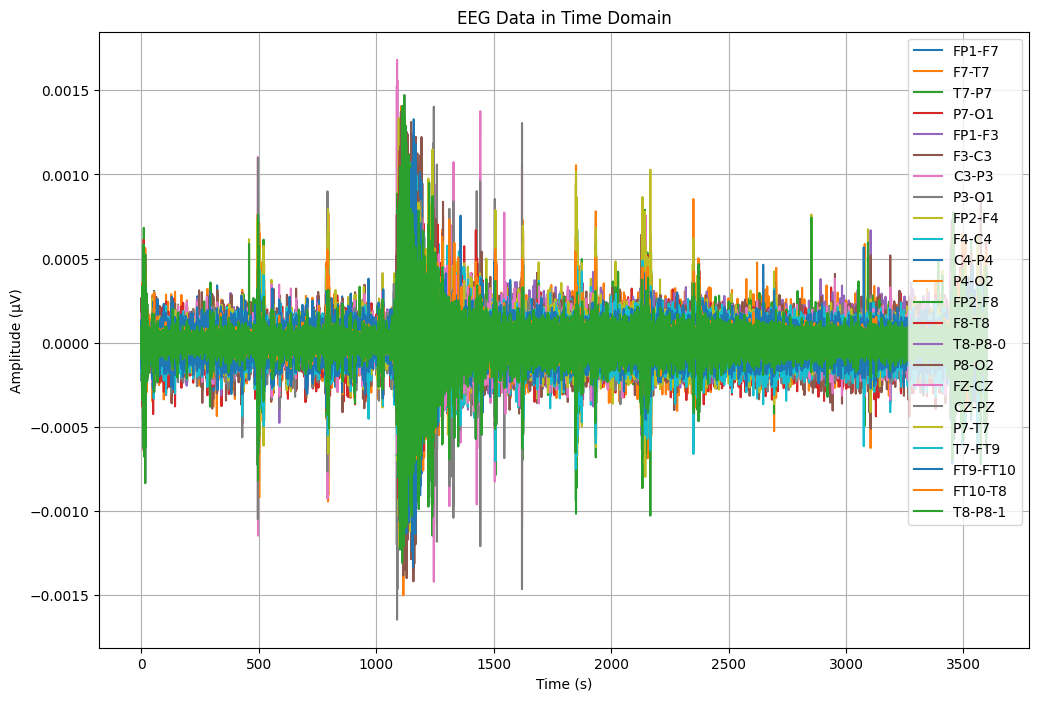

In [ ]:
# Time Domain
# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']  # Anda bisa memilih saluran lainnya
time = df1['Time']  # Kolom waktu

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran
for channel in channels:
    plt.plot(time, df1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Load data into a DataFrame (asuming it's loaded already)
# df = pd.read_csv("eeg_data.csv")  # Contoh jika data dalam bentuk CSV

# Menentukan sample rate (misalkan 256 Hz)
sample_rate = 256  # Sesuaikan dengan sample rate data kamu

# Konversi waktu ke indeks data (dalam sampel)
start_time_seconds = 966   # Waktu mulai (15:05:00) dalam detik dari 14:43:12
end_time_seconds = 1316    # Waktu akhir (15:10:00) dalam detik dari 14:43:12

start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

# Potong data berdasarkan rentang waktu
df_cut = df1.iloc[start_index:end_index]

# Menyimpan ke file CSV
csv_file = "/content/drive/MyDrive/TA/chb05_13_2menit.csv"
df_cut.to_csv(csv_file, index=False)

print(f"Data berhasil disimpan dalam file CSV: {csv_file}")

Data berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/chb05_13_2menit.csv


In [ ]:
# import data yang sudah dipotong
TA1 = pd.read_csv("/content/drive/MyDrive/TA/chb05_13_2menit.csv")
TA1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,0.000003,0.000061,-0.000005,-0.000032,-1.621490e-05,0.000047,8.791209e-06,-0.000013,0.000021,0.000060,...,-0.000010,-1.367521e-06,0.000051,1.934066e-05,5.665446e-06,-0.000008,-8.009768e-06,-7.228327e-06,-0.000010,966.000000
1,0.000006,0.000050,0.000001,-0.000032,-1.035409e-05,0.000044,4.102564e-06,-0.000012,0.000026,0.000046,...,-0.000013,9.768010e-07,0.000045,1.738706e-05,-9.768010e-07,-0.000015,-2.148962e-06,-3.321123e-06,-0.000013,966.003906
2,0.000005,0.000041,0.000009,-0.000034,-9.768010e-07,0.000038,1.953602e-07,-0.000015,0.000037,0.000032,...,-0.000011,-3.711844e-06,0.000035,1.074481e-05,-8.400488e-06,-0.000027,1.953602e-07,1.191697e-05,-0.000011,966.007812
3,0.000003,0.000032,0.000016,-0.000035,5.274725e-06,0.000030,-5.860806e-07,-0.000018,0.000044,0.000021,...,-0.000010,-1.191697e-05,0.000028,-1.953602e-07,-1.543346e-05,-0.000012,2.539683e-06,4.884005e-06,-0.000010,966.011719
4,-0.000003,0.000022,0.000025,-0.000029,8.400488e-06,0.000021,-5.860806e-07,-0.000014,0.000051,0.000007,...,-0.000004,-9.963370e-06,0.000024,-6.446886e-06,-2.442002e-05,-0.000002,8.009768e-06,-9.768010e-07,-0.000004,966.015625


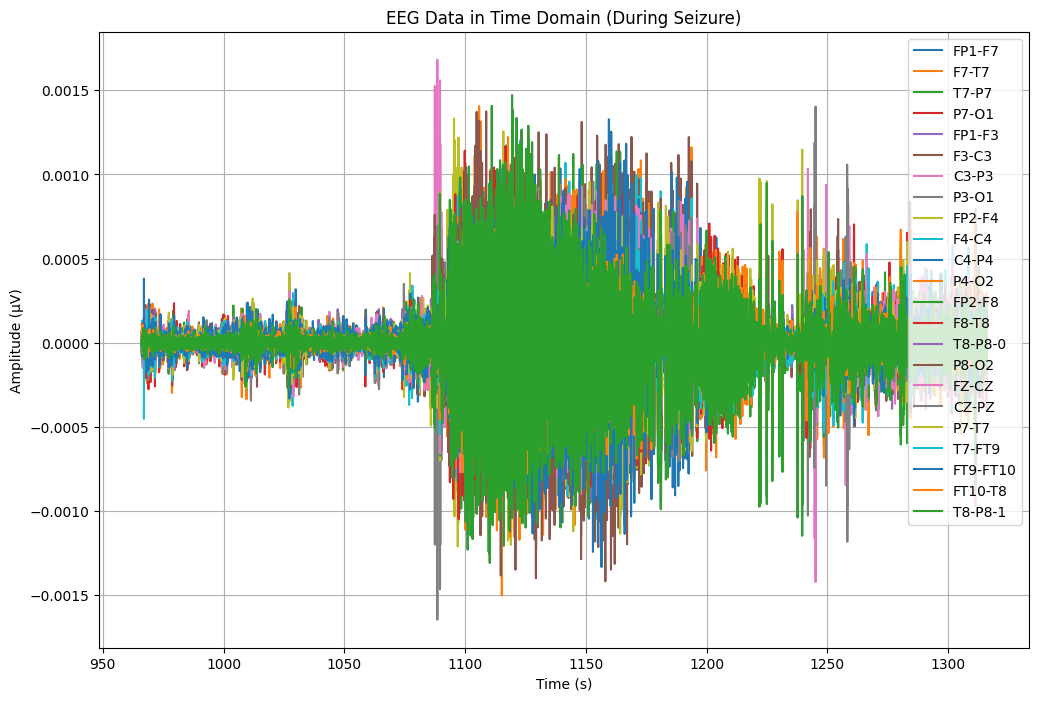

In [ ]:
# menampilkan data yang sudah dipotong dalam domain time
# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Mengambil data waktu dari kolom 'Time'
time = TA1['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in TA1.columns:  # Memastikan saluran ada dalam data
        plt.plot(time, TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


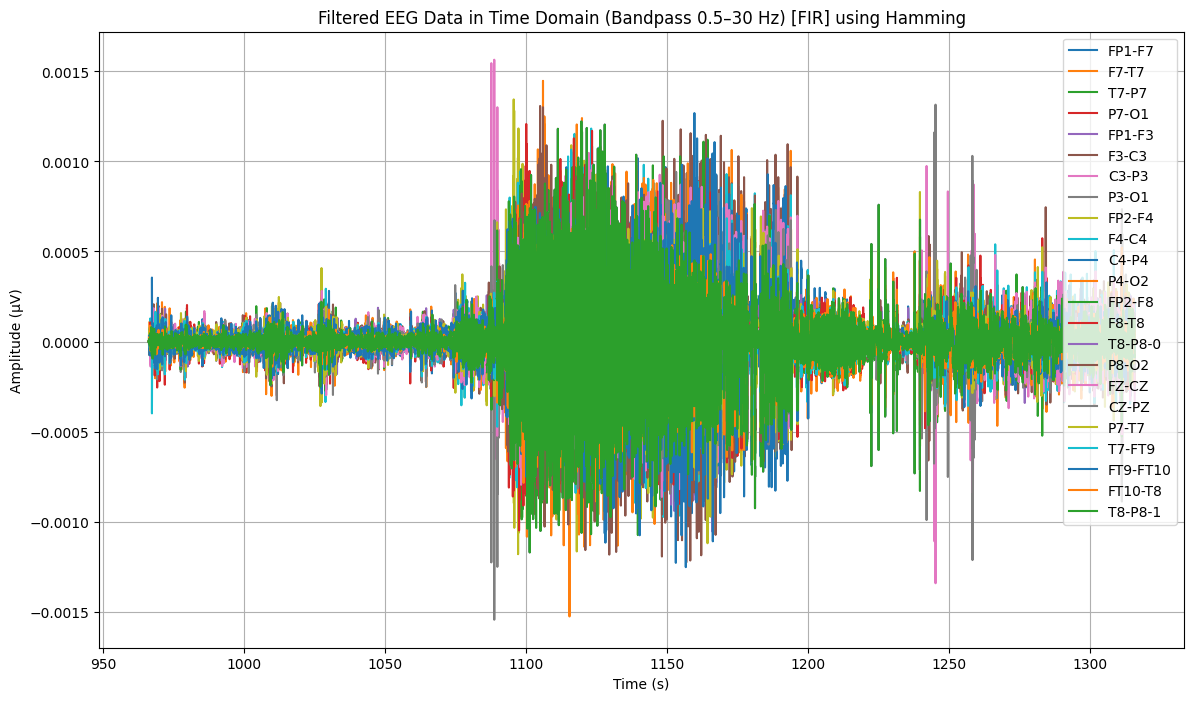

In [ ]:
from scipy.signal import firwin, lfilter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk membuat filter band-pass menggunakan FIR
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate  # Frekuensi Nyquist
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')  # Desain koefisien filter FIR dengan Hamming window
    filtered_data = lfilter(taps, 1.0, data, axis=0)  # Terapkan filter pada data
    return filtered_data

# Parameter untuk filter
lowcut_freq = 0.5  # Frekuensi cutoff bawah dalam Hz
highcut_freq = 30  # Frekuensi cutoff atas dalam Hz
sampling_rate = 256  # Frekuensi sampling (dalam data EEG Anda)
num_taps = 101  # Panjang filter (orde + 1)

# Mengambil data waktu dan sinyal EEG dari data yang sudah dipotong (TA1)
time = TA1['Time'].values  # Kolom waktu
eeg_columns = TA1.columns[:-1]  # Semua kolom kecuali 'Time' (saluran EEG)
eeg_data = TA1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

# Membuat DataFrame dari data yang telah difilter
filtered_df = pd.DataFrame(filtered_data, columns=eeg_columns)
filtered_df['Time'] = time  # Menambahkan kolom waktu ke data yang telah difilter

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        plt.plot(filtered_df['Time'], filtered_df[channel], label=channel)  # Menampilkan data yang sudah difilter

# Memberikan judul dan label pada plot
plt.title('Filtered EEG Data in Time Domain (Bandpass 0.5–30 Hz) [FIR] using Hamming')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


In [ ]:
filtered_df

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,-2.016090e-09,-4.206907e-08,3.628962e-09,2.217699e-08,1.115570e-08,-3.212303e-08,-6.048269e-09,8.736389e-09,-1.465025e-08,-4.126264e-08,...,6.854705e-09,9.408419e-10,-3.507996e-08,-1.330619e-08,-3.897774e-09,5.510645e-09,5.510645e-09,4.973021e-09,6.854705e-09,966.000000
1,-6.311084e-09,-8.490009e-08,3.403118e-09,4.845459e-08,2.047717e-08,-6.869343e-08,-1.006246e-08,1.838763e-08,-3.568153e-08,-8.097784e-08,...,1.747927e-08,4.541818e-10,-7.277058e-08,-2.788998e-08,-3.993704e-09,1.667683e-08,8.074849e-09,8.237735e-09,1.747927e-08,966.003906
2,-1.034981e-08,-1.123222e-07,-3.475283e-09,7.235190e-08,2.057067e-08,-9.515359e-08,-9.678372e-09,2.874709e-08,-6.232514e-08,-1.020468e-07,...,2.574975e-08,2.708328e-09,-9.639199e-08,-3.527503e-08,2.610681e-09,3.609748e-08,7.252656e-09,-3.944077e-10,2.574975e-08,966.007812
3,-1.110587e-08,-1.127442e-07,-1.721132e-08,8.600172e-08,1.019936e-08,-9.935702e-08,-5.759068e-09,3.748432e-08,-8.730326e-08,-9.417006e-08,...,2.901960e-08,1.105658e-08,-9.719242e-08,-2.778139e-08,1.620787e-08,4.363123e-08,2.445449e-09,-8.276333e-09,2.901960e-08,966.011719
4,-5.328576e-09,-8.396452e-08,-3.709595e-08,8.175227e-08,-6.813691e-09,-7.829704e-08,-1.371326e-10,3.832496e-08,-1.060259e-07,-5.688576e-08,...,2.271066e-08,1.883586e-08,-7.637061e-08,-7.859834e-09,3.611791e-08,3.480151e-08,-7.496618e-09,-1.099762e-08,2.271066e-08,966.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89595,-5.493869e-05,-2.624625e-05,-6.601691e-05,-1.776484e-04,1.100559e-04,-2.271560e-04,-1.576409e-04,-5.130696e-05,1.075045e-04,-2.574615e-04,...,-8.673445e-05,-1.382809e-04,-3.523264e-04,-1.529013e-04,6.632593e-05,-1.920290e-05,-2.897749e-05,3.839514e-06,-8.673445e-05,1315.980469
89596,-5.818061e-05,-2.721144e-05,-6.548670e-05,-1.790203e-04,1.040994e-04,-2.274324e-04,-1.618215e-04,-4.594008e-05,1.041832e-04,-2.606849e-04,...,-8.699658e-05,-1.376934e-04,-3.507143e-04,-1.512711e-04,6.579572e-05,-1.690532e-05,-2.831564e-05,5.575942e-07,-8.699658e-05,1315.984375
89597,-6.151112e-05,-2.614158e-05,-6.713847e-05,-1.801109e-04,9.764581e-05,-2.276919e-04,-1.775433e-04,-2.854836e-05,1.017948e-04,-2.639934e-04,...,-8.593174e-05,-1.371210e-04,-3.494906e-04,-1.496196e-04,6.744749e-05,-1.516017e-05,-2.894837e-05,-4.499524e-06,-8.593174e-05,1315.988281
89598,-6.475529e-05,-2.225801e-05,-7.133272e-05,-1.808308e-04,9.067815e-05,-2.277683e-04,-2.027775e-04,-6.307648e-07,1.005305e-04,-2.670199e-04,...,-8.491862e-05,-1.369048e-04,-3.487043e-04,-1.473898e-04,7.164175e-05,-1.487618e-05,-3.080210e-05,-8.778398e-06,-8.491862e-05,1315.992188


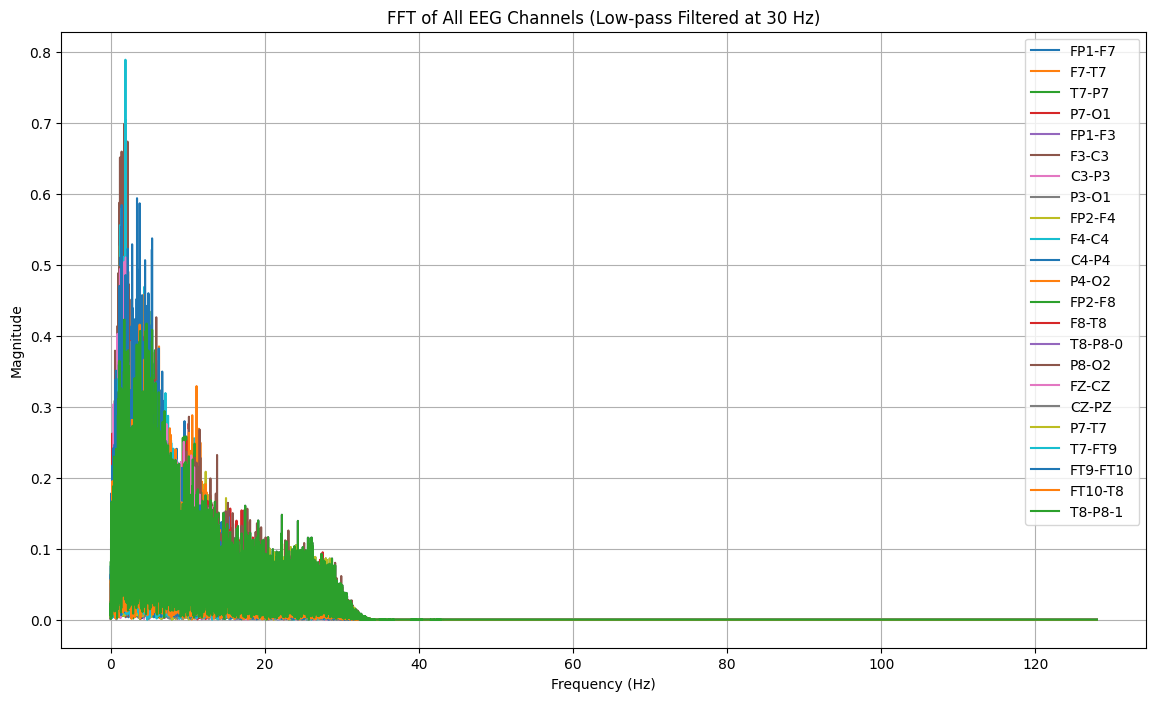

In [ ]:
# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT
        plt.plot(fft_freqs, fft_vals, label=channel)  # Menambahkan ke plot

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels (Low-pass Filtered at 30 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


       Frequency (Hz)  FP1-F7 (Magnitude)  F7-T7 (Magnitude)  \
0            0.000000            0.017945           0.011882   
1            0.002857            0.005658           0.006496   
2            0.005714            0.009019           0.009255   
3            0.008571            0.004134           0.003519   
4            0.011429            0.001989           0.004417   
...               ...                 ...                ...   
44795      127.985714            0.000032           0.000011   
44796      127.988571            0.000035           0.000010   
44797      127.991429            0.000038           0.000007   
44798      127.994286            0.000031           0.000013   
44799      127.997143            0.000034           0.000013   

       T7-P7 (Magnitude)  P7-O1 (Magnitude)  FP1-F3 (Magnitude)  \
0               0.014550           0.017418            0.016005   
1               0.005367           0.002387            0.006327   
2               0.005807      

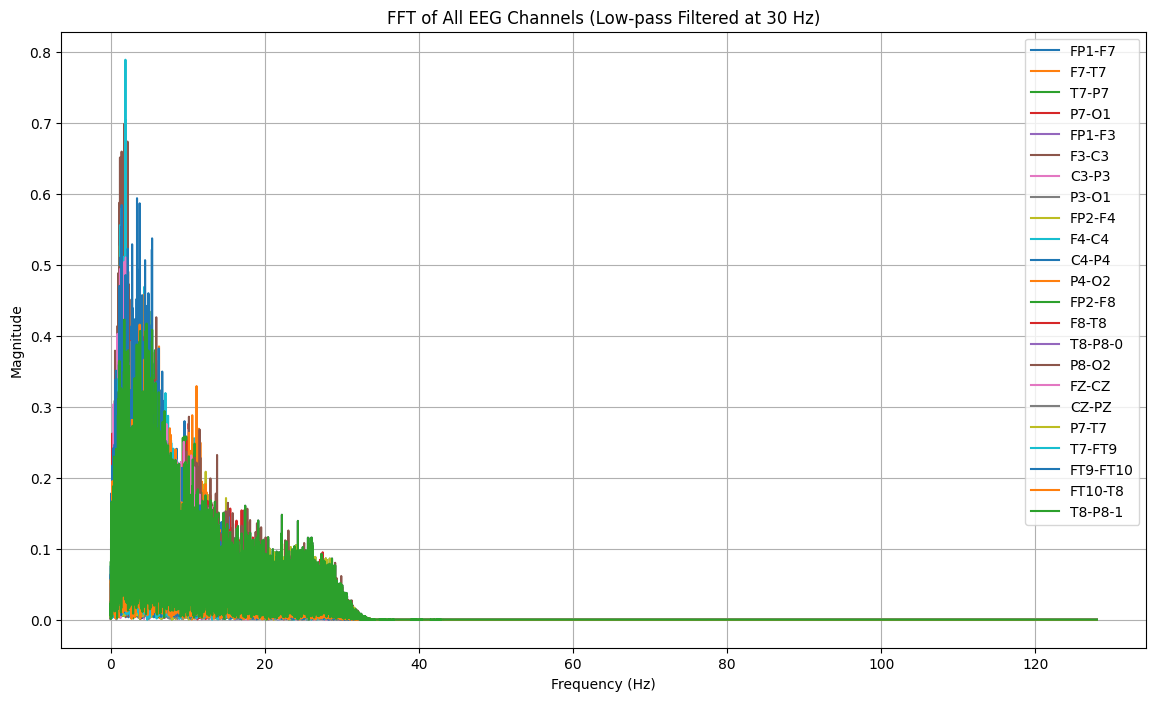

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat DataFrame kosong untuk menyimpan hasil FFT
fft_df = pd.DataFrame()

# Menghitung FFT untuk setiap saluran EEG dan memasukkan hasilnya ke dalam DataFrame
for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT

        # Membuat DataFrame untuk hasil FFT dari saluran ini
        channel_fft_df = pd.DataFrame({'Frequency (Hz)': fft_freqs, f'{channel} (Magnitude)': fft_vals})

        # Gabungkan ke DataFrame utama
        if fft_df.empty:
            fft_df = channel_fft_df
        else:
            fft_df = pd.merge(fft_df, channel_fft_df, on='Frequency (Hz)')

# Menampilkan DataFrame yang berisi frekuensi dan magnitude untuk setiap saluran EEG
print(fft_df)

# Plot hasil FFT untuk semua saluran EEG
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        plt.plot(fft_df['Frequency (Hz)'], fft_df[f'{channel} (Magnitude)'], label=channel)

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels (Low-pass Filtered at 30 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


In [ ]:
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 1086:
        return "tidak kejang"
    elif 1086 <= row['Time'] < 1196:
        return "kejang"
    else:
        return "tidak kejang"

# Menyalin data1 ke df1 dan menambahkan kolom 'seizure' berdasarkan fungsi di atas
TA_1 = filtered_df.copy()
TA_1['seizure'] = filtered_df.apply(label_seizure, axis=1)

# Menampilkan hasil
print(TA_1[['Time', 'seizure', 'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']].head())

         Time       seizure        FP1-F7         F7-T7         T7-P7  \
0  966.000000  tidak kejang -2.016090e-09 -4.206907e-08  3.628962e-09   
1  966.003906  tidak kejang -6.311084e-09 -8.490009e-08  3.403118e-09   
2  966.007812  tidak kejang -1.034981e-08 -1.123222e-07 -3.475283e-09   
3  966.011719  tidak kejang -1.110587e-08 -1.127442e-07 -1.721132e-08   
4  966.015625  tidak kejang -5.328576e-09 -8.396452e-08 -3.709595e-08   

          P7-O1        FP1-F3         F3-C3         C3-P3         P3-O1  ...  \
0  2.217699e-08  1.115570e-08 -3.212303e-08 -6.048269e-09  8.736389e-09  ...   
1  4.845459e-08  2.047717e-08 -6.869343e-08 -1.006246e-08  1.838763e-08  ...   
2  7.235190e-08  2.057067e-08 -9.515359e-08 -9.678372e-09  2.874709e-08  ...   
3  8.600172e-08  1.019936e-08 -9.935702e-08 -5.759068e-09  3.748432e-08  ...   
4  8.175227e-08 -6.813691e-09 -7.829704e-08 -1.371326e-10  3.832496e-08  ...   

          F8-T8       T8-P8-0         P8-O2         FZ-CZ         CZ-PZ  \
0 -1.

In [ ]:
# Simpan data yang sudah dilabel jadi kejang dan tidak kejang
TA_1.to_csv("/content/drive/MyDrive/TA/hamming_bandpass_chb05_13_2menit.csv", index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Misalkan df adalah dataframe yang Anda miliki, dengan kolom 'seizure' yang berisi label "kejang" dan "tidak kejang"
# Contoh data:
# df = pd.read_csv('data.csv')

# Menentukan fitur (X) dan label (y)
X = TA_1.drop(['Time', 'seizure'], axis=1)  # Menghapus kolom 'Time' dan 'seizure' dari fitur
y = TA_1['seizure']  # Label target

# Membagi data menjadi data pelatihan dan data pengujian secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Membuat dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9810267857142857
Laporan Klasifikasi:
               precision    recall  f1-score   support

      kejang       1.00      0.94      0.97      5632
tidak kejang       0.97      1.00      0.99     12288

    accuracy                           0.98     17920
   macro avg       0.99      0.97      0.98     17920
weighted avg       0.98      0.98      0.98     17920

